# Clustering Crypto

In [42]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Data Preprocessing

In [43]:
# Loade the cryptocurrencies data
file_path = Path("Resources/crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [44]:
# Keep only cryptocurrencies that are on trading
crypto_df.drop(crypto_df[crypto_df['IsTrading'] == False].index, inplace=True)

In [45]:
# Remove the "IsTrading" column
columns=["CoinName", "Algorithm", "IsTrading", "ProofType", "TotalCoinsMined", "TotalCoinSupply"]
crypto_df.columns=columns
crypto_df = crypto_df.drop(['IsTrading'], axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [46]:
# Remove rows with at least 1 null value
crypto_df = crypto_df.dropna()

In [47]:
# Remove rows with cryptocurrencies without coins mined
crypto_df =crypto_df[crypto_df!=0].dropna()

In [48]:
# Fetch the cryptocurrencies names prior to drop them from crypto_df
coins_name = crypto_df['CoinName']
coins_name.head()

42        42 Coin
404       404Coin
1337    EliteCoin
BTC       Bitcoin
ETH      Ethereum
Name: CoinName, dtype: object

In [49]:
# Remove the cryptocurrency name since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop(columns='CoinName', axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [50]:
# Create dummies variables for text features
dummies = pd.get_dummies(crypto_df[['Algorithm', 'ProofType']], drop_first=True)
X = pd.concat([crypto_df.drop(['Algorithm', 'ProofType'],axis=1), dummies],axis=1)
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Standardize data
data_scaler = StandardScaler()
data_scaler.fit_transform(X)

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

### Reducing Dimensions Using PCA

In [52]:
# Use PCA to reduce dimension to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(X)

In [53]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(
    data=crypto_pca, columns=["PC 1", "PC 2", "PC 3"], index=X.index
)
pcs_df.head()

,PC 1,PC 2,PC 3
42,-1.161008e+10,-5.638477e+08,0.814394
404,-1.062159e+10,-1.211416e+09,0.814151
1337,2.750664e+11,1.312312e+11,0.989798
BTC,-1.158292e+10,-5.688662e+08,-0.712951
ETH,-1.155621e+10,-6.570914e+08,-0.706116


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [54]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [55]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)
# Fit the model
model.fit(pcs_df)
# Predict clusters
predictions = model.predict(pcs_df)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
42,-1.161008e+10,-5.638477e+08,0.814394,0
404,-1.062159e+10,-1.211416e+09,0.814151,0
1337,2.750664e+11,1.312312e+11,0.989798,2
BTC,-1.158292e+10,-5.688662e+08,-0.712951,0
ETH,-1.155621e+10,-6.570914e+08,-0.706116,0


In [56]:
clustered_df = pd.concat([third_df, pcs_df], axis=1)
clustered_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,class
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-1.161008e+10,-5.638477e+08,0.814394,0
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-1.062159e+10,-1.211416e+09,0.814151,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.750664e+11,1.312312e+11,0.989798,2
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-1.158292e+10,-5.688662e+08,-0.712951,0
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-1.155621e+10,-6.570914e+08,-0.706116,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000,-1.150581e+10,-5.764150e+08,-0.575183,0
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000,-1.158651e+10,-5.606630e+08,0.773888,0
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0,-1.160147e+10,-5.787421e+08,-0.696109,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000,-1.137153e+10,-5.569600e+08,-0.705950,0
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000,-1.158820e+10,-5.597360e+08,-0.713092,0


### Visualizing Results

#### 3D-Scatter with Clusters

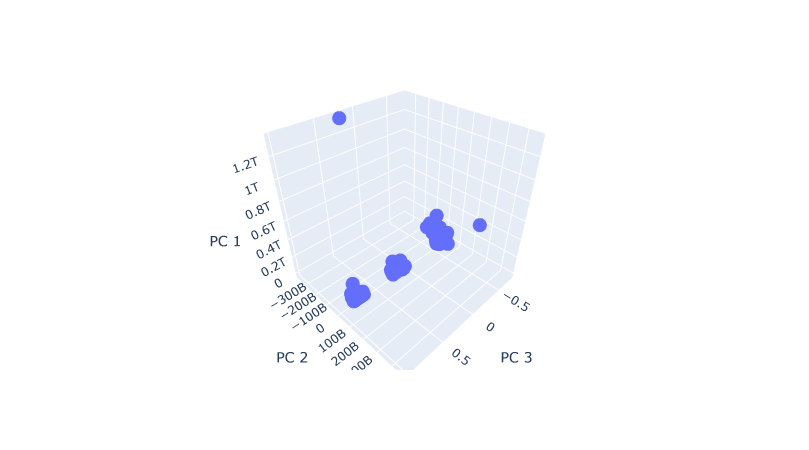

In [57]:
# Create a 3D-Scatter with the PCA data and the clusters
#Plotly express does not work on my computer
fig = px.scatter_3d(
    clustered_df,
    x="PC 3",
    y="PC 2",
    z="PC 1",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [58]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"], width=800)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [59]:
# Print the total number of tradable cryptocurrencies
count= clustered_df['CoinName'].count()
print(f'There are {count} tradable cryptocurrencies')

There are 533 tradable cryptocurrencies


In [60]:
new_df = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]
new_df

,TotalCoinSupply,TotalCoinsMined
42,42,4.199995e+01
404,532000000,1.055185e+09
1337,314159265359,2.927942e+10
BTC,21000000,1.792718e+07
ETH,0,1.076842e+08
LTC,84000000,6.303924e+07
DASH,22000000,9.031294e+06
XMR,0,1.720114e+07
ETC,210000000,1.133597e+08
ZEC,21000000,7.383056e+06


#### Scatter Plot with Tradable Cryptocurrencies

In [61]:
# Scale data to create the scatter plot
data_scaler2 = StandardScaler()
data_scaler.fit_transform(new_df)

array([[-0.15286468, -0.11674788],
       [-0.14499604, -0.09358885],
       [ 4.4937636 ,  0.52587231],
       ...,
       [-0.13215444, -0.09523411],
       [-0.15255408, -0.11658774],
       [-0.15284989, -0.11674507]])

In [62]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
new_df.hvplot.scatter(y="TotalCoinsMined", x="TotalCoinSupply")

:Scatter   [TotalCoinSupply]   (TotalCoinsMined)